In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

#df_luba = pd.read_csv('dataset_89163487248.csv', delimiter=',')
#df_dasha = pd.read_csv('dataset_89162305022.csv', delimiter=',')
    
def cursor_trajectory(n, df1, df2, name, url):
    df1 = df1.loc[(df1['session'] == n) & (df1['action_type'] == 'cursor') & (df1['url'] == url)]
    df2 = df2.loc[(df2['session'] == n) & (df2['action_type'] == 'cursor') & (df2['url'] == url)]
    x1 = list(df1['x'])
    y1 = list(df1['y'])
    x2 = list(df2['x'])
    y2 = list(df2['y'])
    plt.figure(n)
    plt.plot(x1, y1, 'red', x2, y2, 'green')
    plt.savefig(str(n) + name + '.png')
    
def KD_plot(n, df1, df2, name):
    df1 = df1.loc[(df1['session'] == n) & (df1['action_type'] == 'key')]
    df2 = df2.loc[(df2['session'] == n) & (df2['action_type'] == 'key')]
    make_num_list(df1)
    make_num_list(df2)
    x1 = list(df1['num'])
    y1 = list(df1['time'])
    x2 = list(df2['num'])
    y2 = list(df2['time'])
    plt.figure(n)
    plt.plot(x1, y1, 'r--', x2, y2, 'g--')
    plt.savefig(str(n) + name + '.png')
    
def make_num_list(df):
    num_list = []
    i = 1
    while i < len(df)+1:
        num_list.append(i)
        i = i + 1
    df_new = df.copy()
    df_new['num'] = num_list
    return df_new

def time_list(df, t1, t2, graph): # 1-обычный, 2 - триграф
    df = make_num_list(df)
    t_list = []
    i = 1
    while i < len(df) - graph + 1:
        new_time = (int(df.loc[df['num'] == (i+graph)][t1])-int(df.loc[df['num'] == i][t2]))/1000
        t_list.append(new_time)
        i = i + 1
    while graph > 0:
        t_list.append(0)
        graph = graph - 1
    return t_list

def create_and_save_key(df):
    df_key = df.loc[df['action_type'] == 'key']
    df_key_time = df_key[['user_id', 'session', 'action_type', 'key_code', 'down', 'up', 'time']]
    df_key_time.to_csv('key.csv')
    return df_key_time

def do_features(df_path):
    df = pd.read_csv(df_path, delimiter=',')
    df['DD'] = time_list(df, 'down', 'down', 1)
    df['UD'] = time_list(df, 'down', 'up', 1)
    df['UU'] = time_list(df, 'up', 'up', 1)
    df['DU'] = time_list(df, 'up', 'down', 1)
    df['DD3'] = time_list(df, 'down', 'down', 2)
    df['UD3'] = time_list(df, 'down', 'up', 2)
    df['UU3'] = time_list(df, 'up', 'up', 2)
    df['DU3'] = time_list(df, 'up', 'down', 2)
    df['DD4'] = time_list(df, 'down', 'down', 3)
    df['UD4'] = time_list(df, 'down', 'up', 3)
    df['UU4'] = time_list(df, 'up', 'up', 3)
    df['DU4'] = time_list(df, 'up', 'down', 3)
    df['DD5'] = time_list(df, 'down', 'down', 4)
    df['UD5'] = time_list(df, 'down', 'up', 4)
    df['UU5'] = time_list(df, 'up', 'up', 4)
    df['DU5'] = time_list(df, 'up', 'down', 4)
    df['kpm5'] = kpm(df, 5)
    df['kpm10'] = kpm(df, 10)
    df['skew5_time'] = skew_text_input(df, 5, 'time')
    df['skew10_time'] = skew_text_input(df, 10, 'time')
    df['skew20_time'] = skew_text_input(df, 10, 'time')
    df['skew5_kpm5'] = skew_text_input(df, 5, 'kpm5')
    df['skew10_kpm5'] = skew_text_input(df, 10, 'kpm5')
    df['skew5_kpm10'] = skew_text_input(df, 5, 'kpm10')
    df['skew10_kpm10'] = skew_text_input(df, 10, 'kpm10')
    df['error_rate'] = error_rate(df, 20)
    return df

def kpm(df, num):
    df = make_num_list(df)
    v = []
    i = 1
    while i < len(df) - num + 1:
        t = (int(df.loc[df['num'] == (i+num-1)]['up'])-int(df.loc[df['num'] == i]['down']))/1000
        new_v = num/t
        v.append(new_v*60)
        i = i + 1
    while num > 0:
        t = (int(df.loc[df['num'] == (i+num-2)]['up'])-int(df.loc[df['num'] == i]['down']))/1000
        new_v = num/t
        v.append(new_v)
        i += 1
        num = num - 1
    return v

def skew_text_input (df, num, feature):
    s = []
    list_feature = list(df[feature])
    i = 0
    while i < len(df) - num + 1:
        s.append(skew(list_feature[i:i+num]))
        i = i + 1
    while num > 1:        
        s.append(skew(list_feature[i:i+num-1]))
        i += 1
        num = num - 1
    return s

def num_of_error(l):
    num = 0
    for i in l:
        if 0<i<3:
            num += 1
    return num

def error_rate (df, num):
    error_rate_list = []
    key_code = list(df['key_code'])
    i = 0
    while i < len(df) - num + 1:
        rate = num_of_error(key_code[i:i+num])/num
        error_rate_list.append(rate)
        i = i + 1
    while num > 1:
        error_rate_list.append(num_of_error(key_code[i:i+num-1])/(num-1))
        i += 1
        num = num - 1
    return error_rate_list

def create_and_save_mouse(df, name):
    df_mouse = df.loc[df['action_type'] == 'mouse']
    df_mouse_time = df_mouse[['user_id', 'session', 'action_type', 'key_code', 'down', 'up', 'time']]
    df_mouse_time.to_csv(name + '.csv')
    return df_mouse_time

In [4]:
df = create_and_save_key(pd.read_csv('dataset_89176732344.csv', delimiter=','))
df = do_features('./key.csv')
feature_list = list(df)[5:]
df[feature_list].describe()

In [7]:
list(df[feature_list].describe()['UD'])

[619.0,
 1.3369644588045229,
 4.942219350204003,
 0.0,
 0.1085,
 0.255,
 0.6825000000000001,
 55.387]

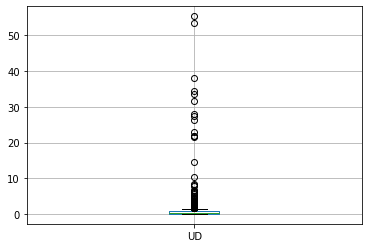

In [8]:
df[['session', 'UD']].boxplot(column=['UD'])

In [9]:
df = df[df.UD < 4]

In [44]:
#import pandas_profiling
#df.profile_report()

In [13]:
#import pandas_profiling
#from pandas_profiling import ProfileReport

In [14]:
#profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [45]:
#profile.to_file("your_report.html")

In [2]:
#i = 1
#while i < 5:
#    KD(i, df_dasha, df_luba, 'KD')
#    i = i + 1

#i = 1
#while i < 5:
#    cursor_trajectory(i, df_dasha, df_luba, 'trajectory_login', '/login')
#    i = i + 1

#i = 1
#while i < 5:
#    cursor_trajectory(i, df_dasha, df_luba, 'trajectory_quest', '/quest')
#    i = i + 1

In [3]:
#df_d = create_and_save_key(df_dasha)
#df_d['DD'] =  DD_list(df_d)
#df_d = make_num_list(df_d)

In [4]:
#plt.scatter(list(df_d['session']), list(df_d['DD']))

In [5]:
#df_d = df_d[df_d.DD < 1]

In [6]:
#plt.scatter(list(df_d['session']), list(df_d['DD']), color='red')
#plt.savefig('DD_d_session.png')

In [7]:
#df_d[['session', 'DD']].boxplot(by=['session'])
#plt.savefig('DD_d_session_box.png')

In [8]:
#df_l = create_and_save_key(df_luba)
#df_l['DD'] =  DD_list(df_l)
#df_l = make_num_list(df_l)

In [9]:
#plt.scatter(list(df_l['session']), list(df_l['DD']))

In [10]:
#df_l = df_l[df_l.DD < 1]

In [11]:
#plt.scatter(list(df_l['session']), list(df_l['DD']), color='green')
#plt.savefig('DD_l_session.png')

In [12]:
#df_l[['session', 'DD']].boxplot(by=['session'])
#plt.savefig('DD_l_session_box.png')

In [13]:
#df_d[['session', 'DD']].boxplot(column=['DD'])
#plt.savefig('DD_d.png')

In [14]:
#df_l[['session', 'DD']].boxplot(column=['DD'])
#plt.savefig('DD_l.png')

In [10]:
#feature_list = list(key_d)[6:]
#j = 1
#for f in feature_list:
#    plt.figure(j)
#    key_d[['session', f]].boxplot(column=[f])
#    plt.savefig(f + 'key_d.png')
#    j += 1

In [5]:
#df = pd.read_csv('dataset_89163487248.csv', delimiter=',')
#df_r = pd.read_csv('remote_dataset_89163487248.csv', delimiter=',')
#create_and_save_key(df_r)
#df = do_features('./df/key_l.csv')
#df_r = do_features('./df/key_l_r.csv')
#feature_list_l = list(df)[6:]
#feature_list_l_r = list(df_r)[6:]
#df[feature_list_l].describe()
#df_r[feature_list_l_r].describe()
#df = df[df.UU < 4]
#df[['session', 'UU']].boxplot(column=['UU'])
#df[feature_list_l].describe()
#df_r = df_r[df_r.UU < 5]
#df_r[['session', 'UU']].boxplot(column=['UU'])
#df_r[feature_list_l].describe()
#df[feature_list_l].describe()

In [16]:
#import pandas_profiling
#df.profile_report()

In [5]:
df = pd.read_csv('./df/key_d.csv')
df_r = pd.read_csv('./df/key_d_r.csv')

In [6]:
df.describe()

,Unnamed: 0,user_id,session,key_code,down,up,time
count,732.000000,7.320000e+02,732.000000,207.0,7.320000e+02,7.320000e+02,732.000000
mean,1553.643443,8.917673e+10,4.273224,1.0,1.606355e+12,1.606355e+12,0.123803
std,919.133331,0.000000e+00,2.910276,0.0,1.349890e+08,1.349890e+08,0.098704
min,26.000000,8.917673e+10,0.000000,1.0,1.606239e+12,1.606239e+12,0.007000
25%,691.750000,8.917673e+10,2.000000,1.0,1.606239e+12,1.606239e+12,0.080000
50%,1623.500000,8.917673e+10,4.000000,1.0,1.606321e+12,1.606321e+12,0.094000
75%,2365.250000,8.917673e+10,7.000000,1.0,1.606558e+12,1.606558e+12,0.127000
max,3081.000000,8.917673e+10,9.000000,1.0,1.606558e+12,1.606558e+12,1.348000


In [7]:
df_r.describe()

,Unnamed: 0,user_id,session,key_code,down,up,time
count,673.000000,6.730000e+02,673.000000,317.0,6.730000e+02,6.730000e+02,673.000000
mean,1118.612184,8.927335e+10,5.083210,1.0,1.606586e+12,1.606586e+12,0.031101
std,656.188825,0.000000e+00,2.523503,0.0,2.284635e+05,2.284649e+05,0.068322
min,0.000000,8.927335e+10,1.000000,1.0,1.606585e+12,1.606585e+12,0.000000
25%,512.000000,8.927335e+10,3.000000,1.0,1.606585e+12,1.606585e+12,0.007000
50%,1120.000000,8.927335e+10,5.000000,1.0,1.606586e+12,1.606586e+12,0.009000
75%,1640.000000,8.927335e+10,7.000000,1.0,1.606586e+12,1.606586e+12,0.012000
max,2266.000000,8.927335e+10,9.000000,1.0,1.606586e+12,1.606586e+12,0.727000


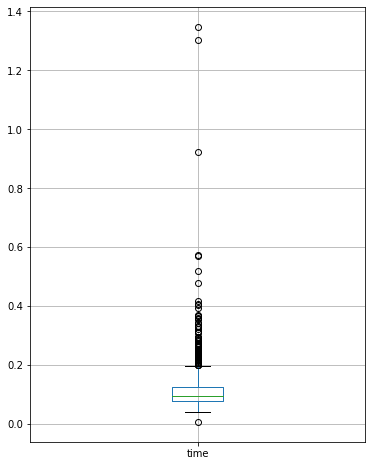

In [8]:
df[['session', 'time']].boxplot(column=['time'], figsize=(6,8))

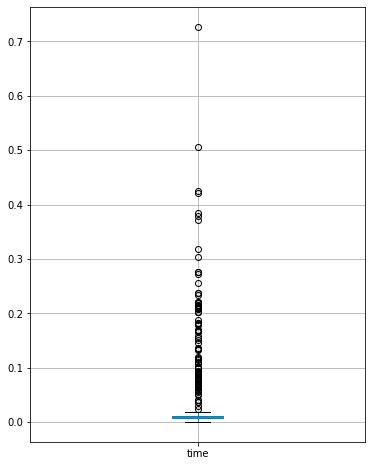

In [9]:
df_r[['session', 'time']].boxplot(column=['time'], figsize=(6,8))

In [40]:
df['method']='local'

In [41]:
df_r['method']='remotely'

In [42]:
data = df.merge(df_r, how='outer')

In [41]:
data = data[data.time < 3]

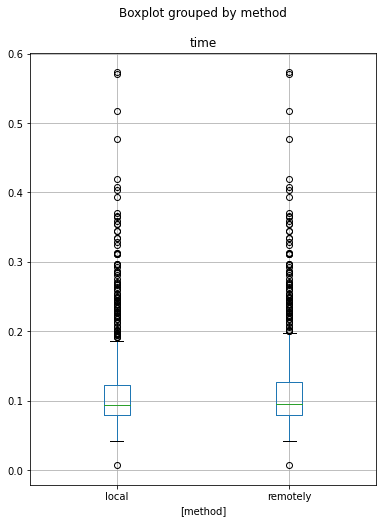

In [43]:
data[['method', 'time']].boxplot(by=['method'], figsize=(6,8))

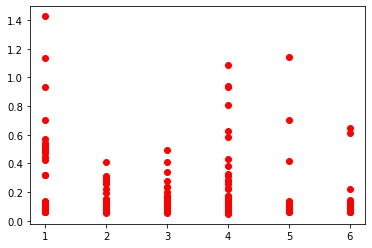

In [46]:
plt.scatter(list(df['session']), list(df['time']), color='red')

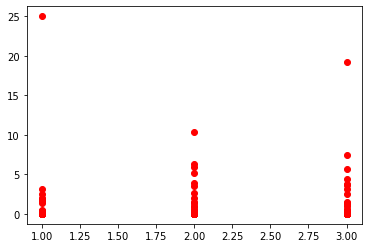

In [47]:
plt.scatter(list(df_r['session']), list(df_r['time']), color='red')

In [32]:
df = create_and_save_key(pd.read_csv('dataset_89162735523.csv', delimiter=','))

In [2]:
df = pd.read_csv('./df/key_s.csv')
df_r = pd.read_csv('./df/key_d_r.csv')

In [4]:
#df_r = df_r[df_r.time < 5]
df_r = df_r[:100]
df = df[:100]
df = df[df.time < 1.5]
df_r = df_r[df_r.time < 1.5]

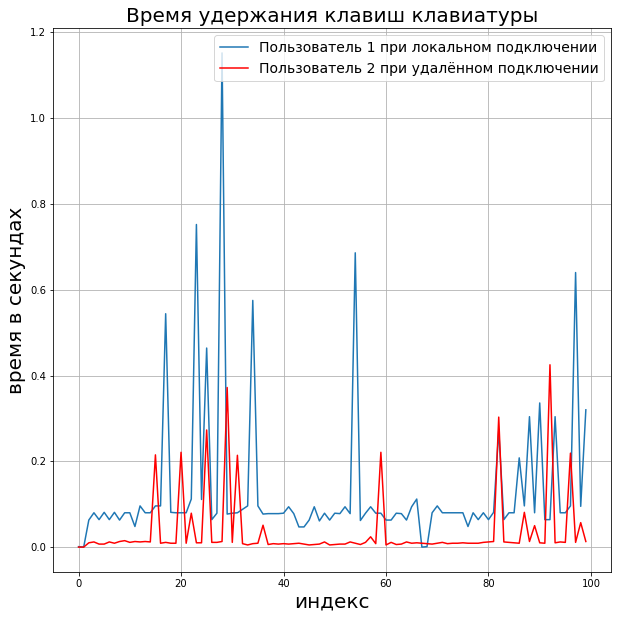

In [7]:
df['time'].plot()
df_r['time'].plot(color='red', figsize=(10,10), grid=True)
plt.legend(["Пользователь 1 при локальном подключении", "Пользователь 2 при удалённом подключении"], fontsize=14)
plt.title("Время удержания клавиш клавиатуры", fontsize=20)
plt.xlabel("индекс", fontsize=20)
plt.ylabel("время в секундах", fontsize=20)
plt.savefig('эксперимент_3_KD.png')

In [16]:
df['UD3'] = time_list(df, 'down', 'up', 2)

In [18]:
df_r['UD3'] = time_list(df_r, 'down', 'up', 2)

In [20]:
df.describe()

,Unnamed: 0,user_id,session,key_code,down,up,time,UD3
count,732.000000,7.320000e+02,732.000000,207.0,7.320000e+02,7.320000e+02,732.000000,732.000000
mean,1553.643443,8.917673e+10,4.273224,1.0,1.606355e+12,1.606355e+12,0.123803,872.996321
std,919.133331,0.000000e+00,2.910276,0.0,1.349890e+08,1.349890e+08,0.098704,13063.131252
min,26.000000,8.917673e+10,0.000000,1.0,1.606239e+12,1.606239e+12,0.007000,0.000000
25%,691.750000,8.917673e+10,2.000000,1.0,1.606239e+12,1.606239e+12,0.080000,0.626750
50%,1623.500000,8.917673e+10,4.000000,1.0,1.606321e+12,1.606321e+12,0.094000,1.430000
75%,2365.250000,8.917673e+10,7.000000,1.0,1.606558e+12,1.606558e+12,0.127000,2.319750
max,3081.000000,8.917673e+10,9.000000,1.0,1.606558e+12,1.606558e+12,1.348000,236399.493000


In [21]:
df = df[df.UD3 < 5]
df_r = df_r[df_r.UD3 < 5]

Text(0, 0.5, 'время в секундах')

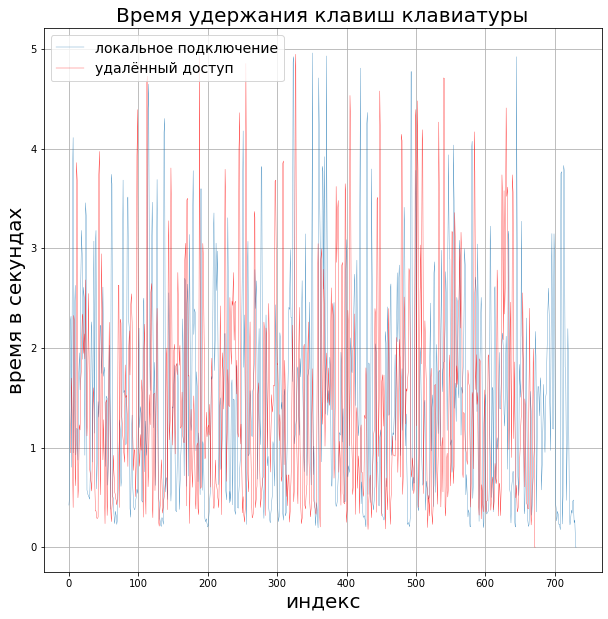

In [27]:
df['UD3'].plot(linewidth = 0.3)
df_r['UD3'].plot(color='red', figsize=(10,10), grid=True, linewidth = 0.3)
plt.legend(["локальное подключение", "удалённый доступ"], fontsize=14)
plt.title("Время удержания клавиш клавиатуры", fontsize=20)
plt.xlabel("индекс", fontsize=20)
plt.ylabel("время в секундах", fontsize=20)
#plt.savefig('UD3.png')

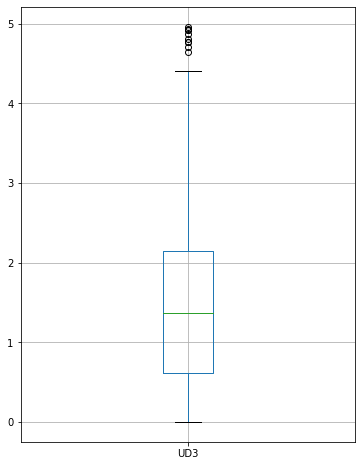

In [23]:
df[['session', 'UD3']].boxplot(column=['UD3'], figsize=(6,8))

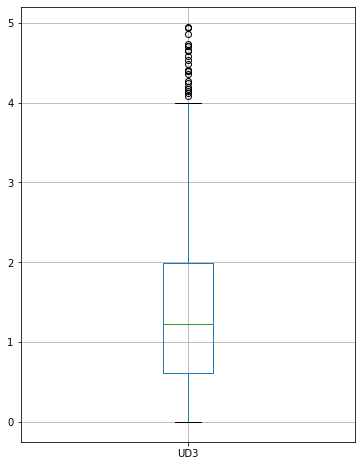

In [24]:
df_r[['session', 'UD3']].boxplot(column=['UD3'], figsize=(6,8))

In [11]:
create_and_save_mouse(pd.read_csv('dataset_89162735523.csv', delimiter=','), 'mouse_s')
create_and_save_mouse(pd.read_csv('dataset_89162735523.csv', delimiter=','), 'mouse_s_r')

,user_id,session,action_type,key_code,down,up,time
19,89162735523,0,mouse,NaN,1.606560e+12,1.606560e+12,0.119
57,89162735523,0,mouse,NaN,1.606560e+12,1.606560e+12,0.128
120,89162735523,0,mouse,NaN,1.606560e+12,1.606560e+12,0.095
152,89162735523,0,mouse,NaN,1.606560e+12,1.606560e+12,0.111
202,89162735523,0,mouse,NaN,1.606560e+12,1.606560e+12,0.112
...,...,...,...,...,...,...,...
5725,89162735523,13,mouse,NaN,1.606560e+12,1.606560e+12,0.116
5771,89162735523,13,mouse,NaN,1.606560e+12,1.606560e+12,0.095
5800,89162735523,13,mouse,NaN,1.606560e+12,1.606560e+12,0.102
5943,89162735523,13,mouse,NaN,1.606560e+12,1.606560e+12,0.086


In [17]:
df = pd.read_csv('./df/mouse_s.csv')
df_r = pd.read_csv('./df/mouse_d_r.csv')

In [18]:
df =df[:80]
df_r = df_r[:80]
df_r = df_r[df_r.time < 0.2]
df = df[df.time < 0.2]
df = df[df.time > 0]

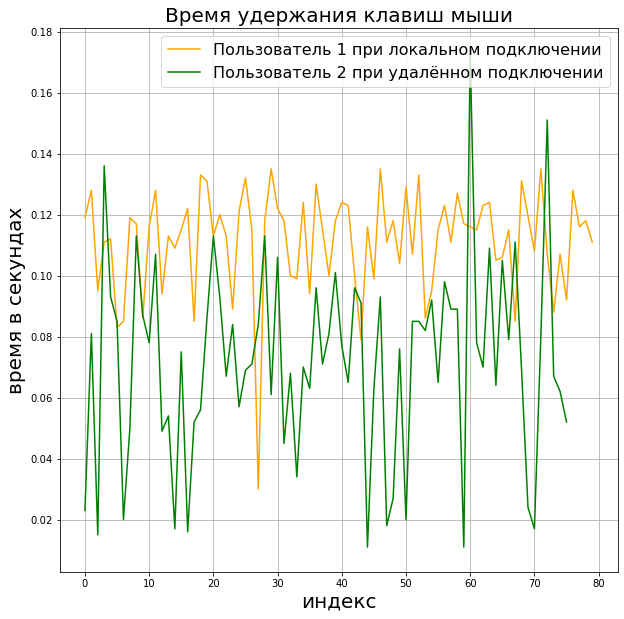

In [19]:
df['time'].plot(color='orange')
df_r['time'].plot(color='green', figsize=(10,10), grid=True).legend(["Пользователь 1 при локальном подключении", "Пользователь 2 при удалённом подключении"], fontsize=16)
plt.title("Время удержания клавиш мыши", fontsize=20)
plt.xlabel("индекс", fontsize=20)
plt.ylabel("время в секундах", fontsize=20)
plt.savefig('эксперимент_3_mouse.png')